In [1]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ================================
# 1. Define Categories and Image Size
# ================================
CATEGORIES = ["01_palm", "02_l", "03_fist", "04_fist_moved", "05_thumb",
              "06_index", "07_ok", "08_palm_moved", "09_c", "10_down"]
IMG_SIZE = 50

# Path to dataset
data_path = "--------\\leapGestRecog"


In [3]:
# ================================
# 2. Load Images and Labels
# ================================
image_data = []
for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        for category in CATEGORIES:
            category_path = os.path.join(folder_path, category)
            if os.path.exists(category_path):
                for img in os.listdir(category_path):
                    try:
                        img_arr = cv2.imread(os.path.join(category_path, img), cv2.IMREAD_GRAYSCALE)
                        img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                        class_index = CATEGORIES.index(category)
                        image_data.append([img_resized, class_index])
                    except Exception as e:
                        print(f"Error loading image {img}: {e}")

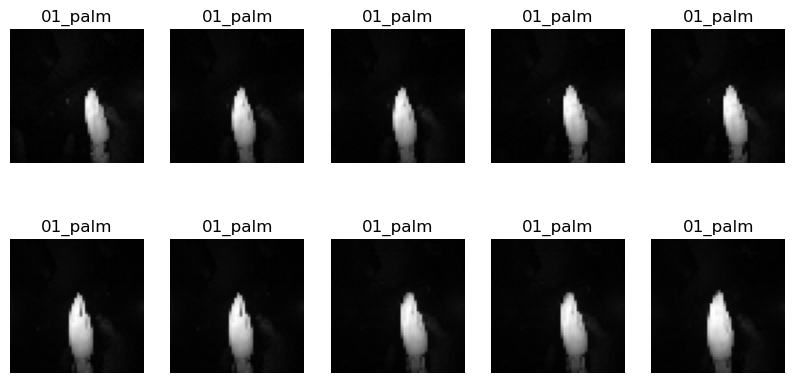

In [5]:
# ================================
# 3. Visualizing Some Sample Images
# ================================
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(image_data[i][0], cmap='gray')
    ax.set_title(CATEGORIES[image_data[i][1]])
    ax.axis("off")
plt.show()

In [7]:
# ================================
# 4. Shuffle and Split Data
# ================================
random.shuffle(image_data)
X, y = zip(*image_data)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
y = to_categorical(y, num_classes=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize input data
X_train = X_train / 255.0
X_test = X_test / 255.0


In [9]:
# ================================
# 5. Build CNN Model
# ================================
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

R:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# ================================
# 6. Train the Model
# ================================
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.7600 - loss: 0.6852 - val_accuracy: 0.9898 - val_loss: 0.0253
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.9953 - loss: 0.0153 - val_accuracy: 0.9990 - val_loss: 0.0051
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.9974 - loss: 0.0089 - val_accuracy: 0.9980 - val_loss: 0.0079
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.9976 - loss: 0.0070 - val_accuracy: 0.9992 - val_loss: 0.0058
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.9966 - loss: 0.0090 - val_accuracy: 0.9980 - val_loss: 0.0060
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.9988 - loss: 0.0029 - val_accuracy: 0.9992 - val_loss: 0.0113
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.9981 - loss: 0.0059 - val_accuracy: 0.9992 - val_loss: 0.0095
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - accuracy: 0.9983 - loss: 0.0056 - 

In [13]:
# ================================
# 7. Evaluate the Model
# ================================
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9998 - loss: 0.0015
Test Accuracy: 99.95%
